## Fetch the dataset 

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

## Dataset characteristics

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
print(f'  Data shape = {wine.data.shape}')
print(f'Target shape = {wine.target.shape}')

  Data shape = (178, 13)
Target shape = (178,)


In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Load data into a dataframe and explore

In [5]:
import pandas as pd

wine_df = pd.DataFrame(wine.data, 
                             columns=wine.feature_names)

wine_df['Medgroups'] = pd.Series(wine.target)

max(wine_df['Medgroups'])

2

## Explore

In [6]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,Medgroups
0,14.23,1.71,2.43,15.6,...,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,...,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,...,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,...,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,...,1.04,2.93,735.0,0


In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,Medgroups
count,178.0000,178.0000,178.0000,178.0000,...,178.0000,178.0000,178.0000,178.0000
mean,13.0006,2.3363,2.3665,19.4949,...,0.9574,2.6117,746.8933,0.9382
std,0.8118,1.1171,0.2743,3.3396,...,0.2286,0.7100,314.9075,0.7750
min,11.0300,0.7400,1.3600,10.6000,...,0.4800,1.2700,278.0000,0.0000
25%,12.3625,1.6025,2.2100,17.2000,...,0.7825,1.9375,500.5000,0.0000
50%,13.0500,1.8650,2.3600,19.5000,...,0.9650,2.7800,673.5000,1.0000
75%,13.6775,3.0825,2.5575,21.5000,...,1.1200,3.1700,985.0000,2.0000
max,14.8300,5.8000,3.2300,30.0000,...,1.7100,4.0000,1680.0000,2.0000


## Random sample (10%)

In [8]:
sample_df = wine_df.sample(frac=0.9, random_state=17)

## Data visualizations

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

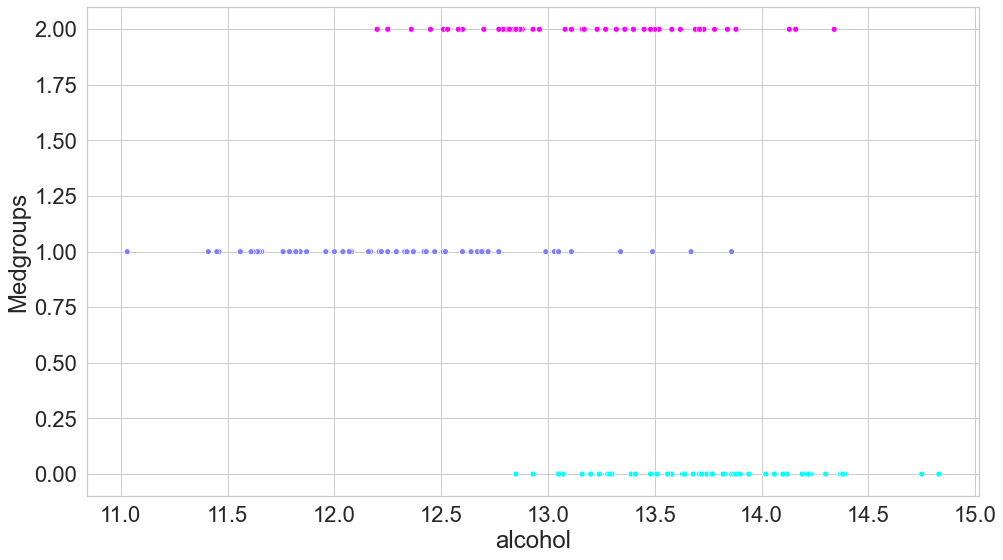

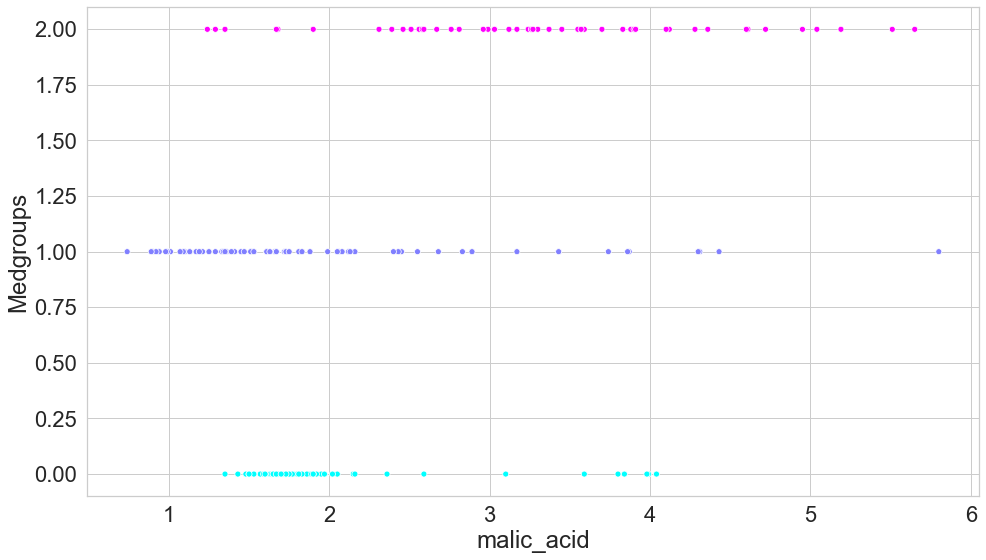

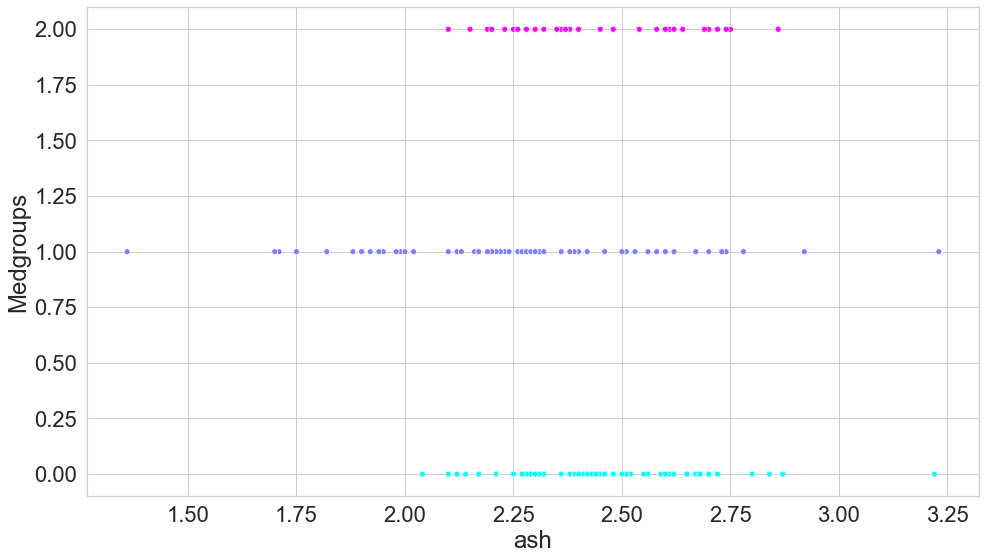

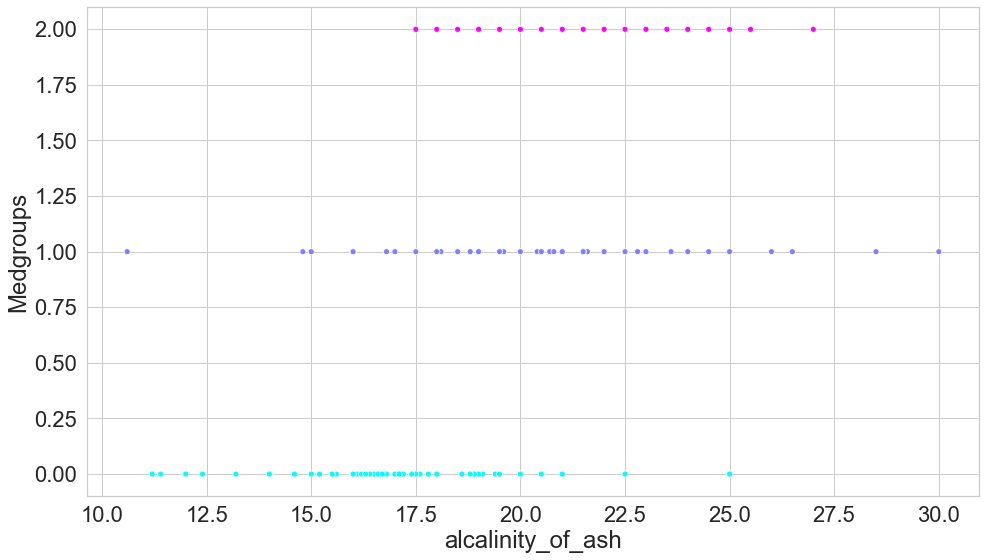

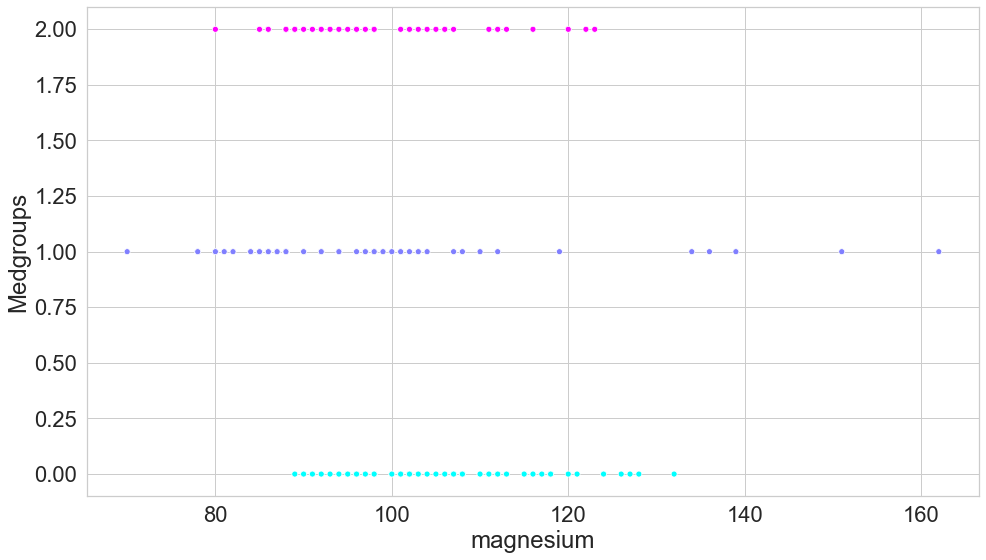

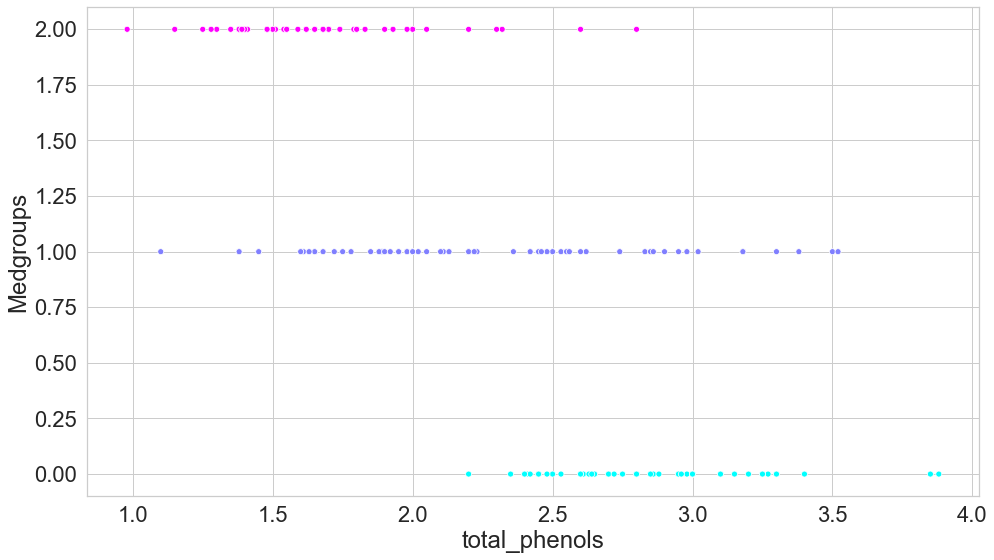

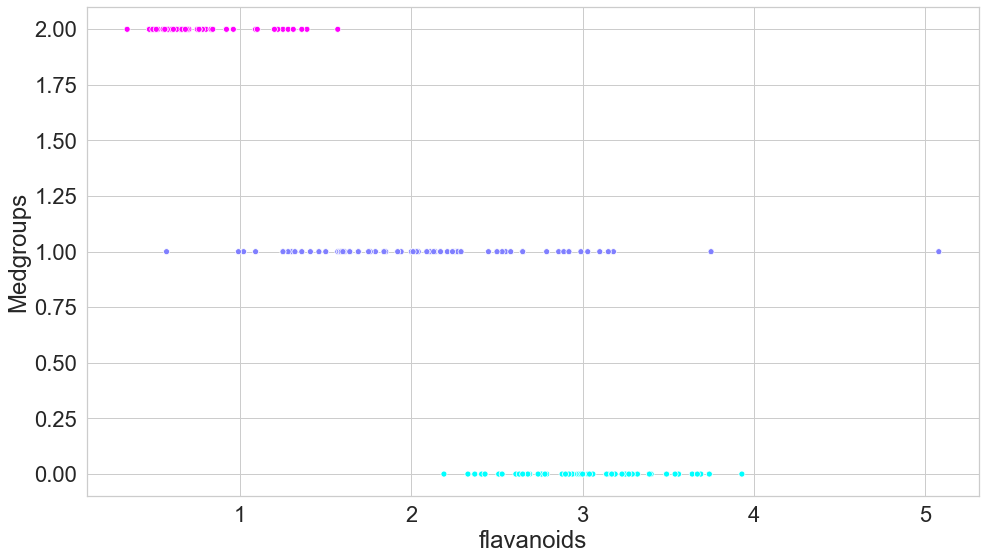

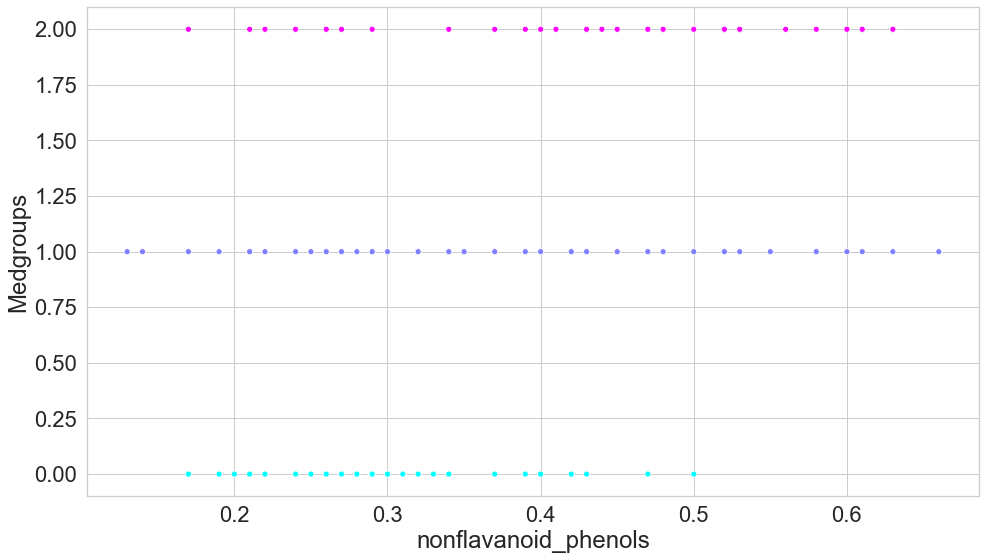

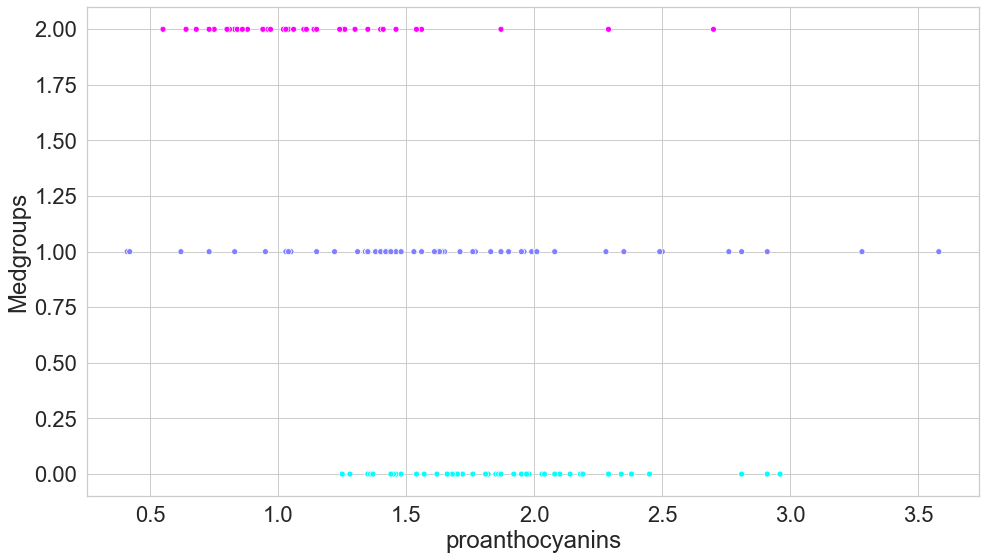

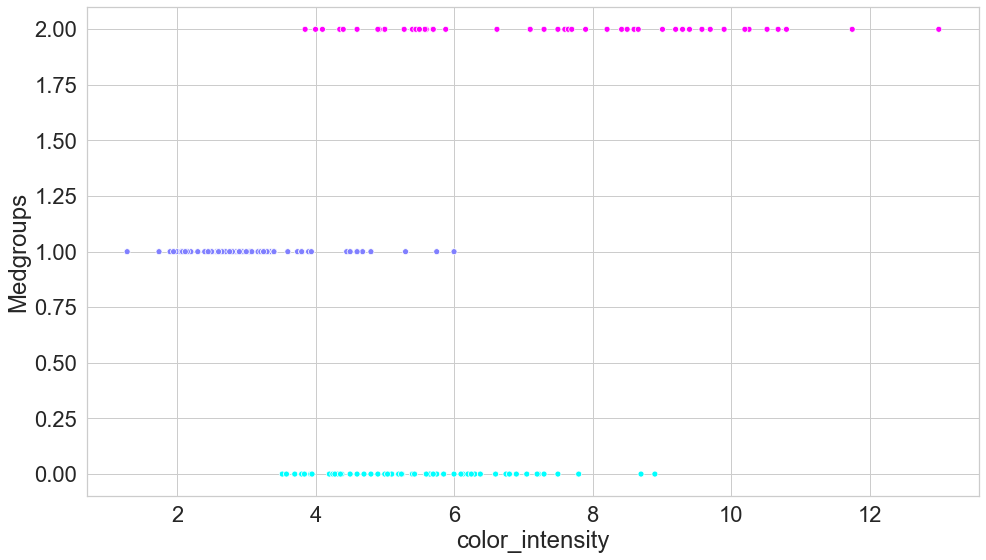

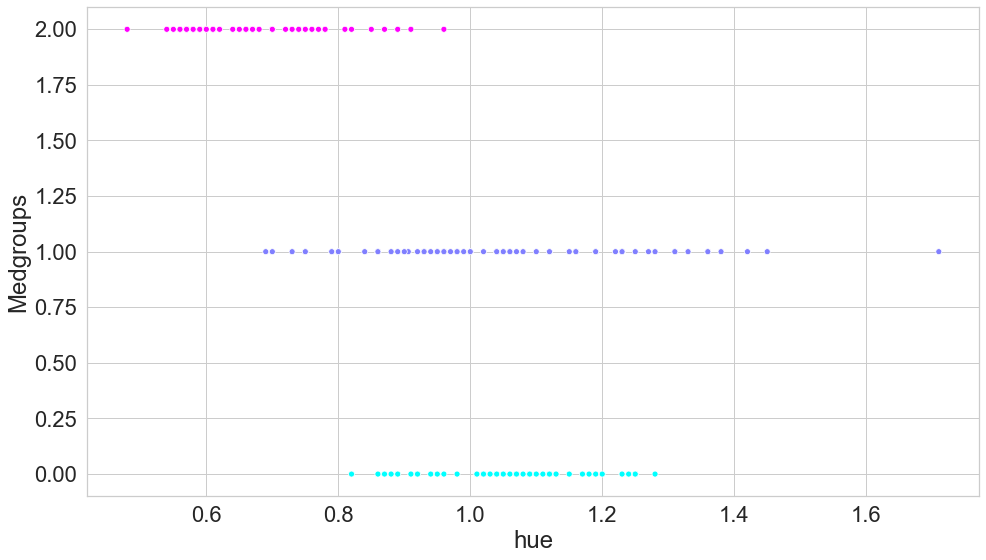

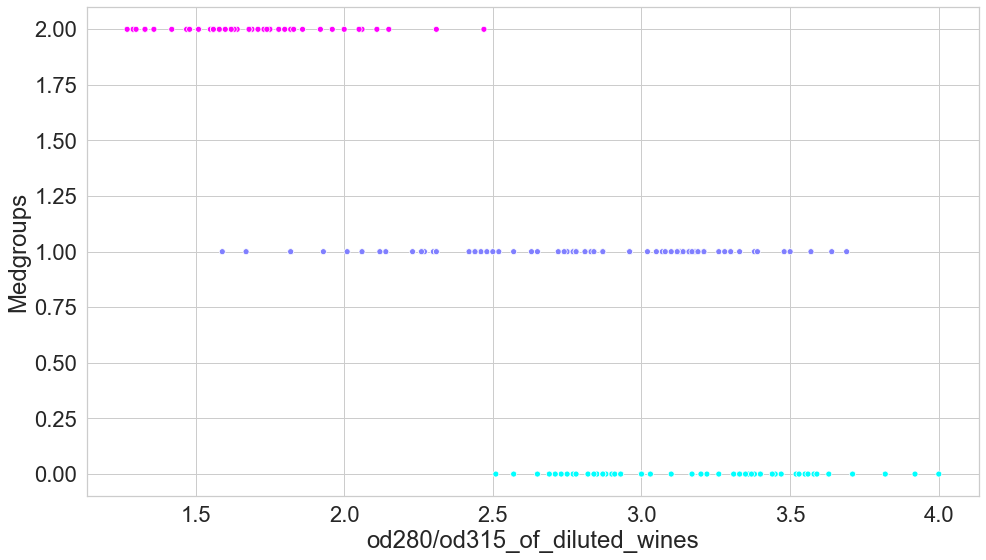

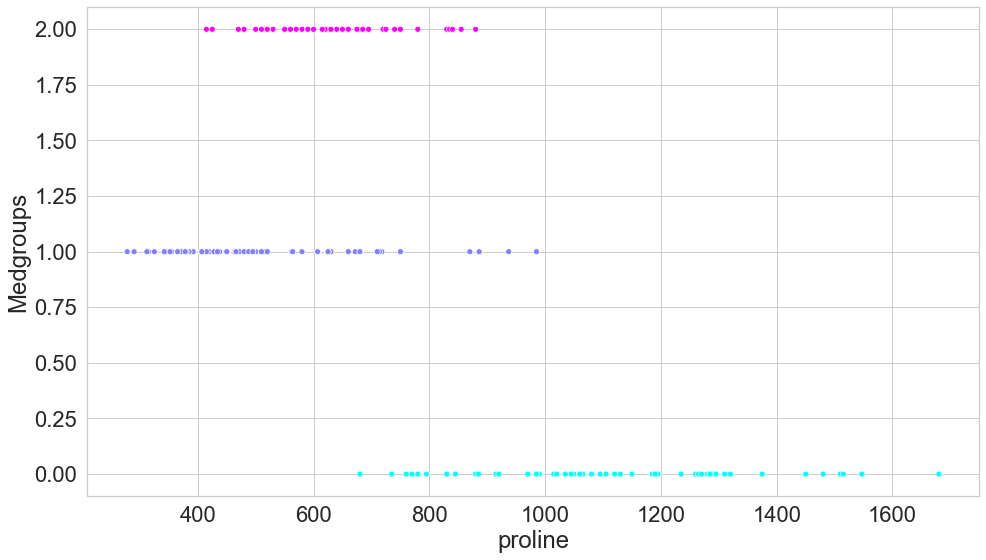

In [10]:
for feature in wine.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=wine_df, x=feature, y='Medgroups', 
                     hue='Medgroups', 
                     palette='cool', legend=False)

## Split the data for training and testing 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(wine.data, wine.target, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (133, 13)
Shape of testing  set = (45, 13)


## Train the model 

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(wine.feature_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

    alcohol:  -0.09528417955403363504
 malic_acid:   0.02768337421328556647
        ash:  -0.12733219748288648887
alcalinity_of_ash:   0.04030703110217569163
  magnesium:  -0.00111919817659374425
total_phenols:   0.12202459367721335548
 flavanoids:  -0.34977567274370818806
nonflavanoid_phenols:  -0.25220164100222020043
proanthocyanins:   0.04673524214837018742
color_intensity:   0.07082908288758996140
        hue:  -0.08450131975992494771
od280/od315_of_diluted_wines:  -0.32572585908581025427
    proline:  -0.00070461853830635008

y-intercept:  3.28496550281567412100


## Test the model 

In [13]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.9
     correlation coefficient = 1.0


## Visualize the expected vs. predicted

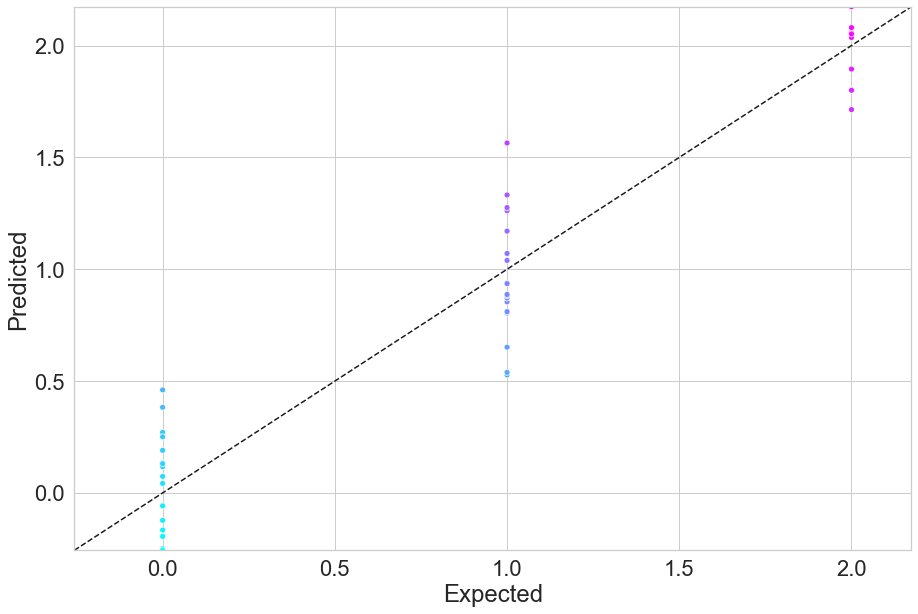

In [14]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## Report 

### We used load_wine data from sklearn.datasets. The shape of the dataset after cleanup and transformation is linear. The independent variables are- Alcohol,Malic acid,Ash,Alcalinity of ash   ,Magnesium Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanin, Color intensity,Hue and the dependent variables are Medgroups. The shapes of the training data is linear and it is also linear for the testing data. The coefficient of determination is 0.9 and the correlation coefficient is 1.0. The attributes that have the most influence are ash,flavinoids,alcohol,phenol(looking at the graph) and the least influence are the rest. This shows that for successful and tasty wine we have to include our strong influenced elements like alcohol,phenol etc. Our models predictions show the more the strong influenced flavors are included,the more the wine will be tasty. The correlation between the predicted values and the expected values of the dependent variable are relatively strong since it shows the regression linearly. 